In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
import numpy as np
import sklearn
print("Numpy and Scikit-learn libraries imported.")

Numpy and Scikit-learn libraries imported.


In [ ]:
X = df.drop('Drug', axis=1)
Y = df['Drug']

print("Features (X) and Target (Y) separated.")
print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("X head:\n", X.head())
print("Y head:\n", Y.head())

Features (X) and Target (Y) separated.
X shape: (200, 5)
Y shape: (200,)
X head:
    Age Sex      BP Cholesterol  Na_to_K
0   23   F    HIGH        HIGH   25.355
1   47   M     LOW        HIGH   13.093
2   47   M     LOW        HIGH   10.114
3   28   F  NORMAL        HIGH    7.798
4   61   F     LOW        HIGH   18.043
Y head:
 0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object


In [ ]:
X = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

print("Categorical features in X converted to numerical format using one-hot encoding.")
print("Updated X head:")
print(X.head())

Categorical features in X converted to numerical format using one-hot encoding.
Updated X head:
   Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0   23   25.355  False   False      False               False
1   47   13.093   True    True      False               False
2   47   10.114   True    True      False               False
3   28    7.798  False   False       True               False
4   61   18.043  False    True      False               False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Data split into training and testing sets.
X_train shape: (160, 6)
Y_train shape: (160,)
X_test shape: (40, 6)
Y_test shape: (40,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

print("DecisionTreeClassifier model trained successfully.")

DecisionTreeClassifier model trained successfully.


In [ ]:
Y_pred = model.predict(X_test)
print("Predictions made on the test set.")
print("First 5 predictions:", Y_pred[:5])

Predictions made on the test set.
First 5 predictions: ['drugX' 'DrugY' 'drugX' 'drugC' 'DrugY']


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


In [ ]:
from sklearn.svm import SVC

svc_model = SVC(random_state=42)
svc_model.fit(X_train, Y_train)

print("Support Vector Classifier model trained successfully.")

Support Vector Classifier model trained successfully.


In [ ]:
svc_Y_pred = svc_model.predict(X_test)
print("Predictions made on the test set using SVC model.")
print("First 5 SVC predictions:", svc_Y_pred[:5])

Predictions made on the test set using SVC model.
First 5 SVC predictions: ['drugX' 'DrugY' 'drugX' 'drugX' 'DrugY']


SVC Model Accuracy: 0.6250
SVC Model F1-score (weighted): 0.5133

Confusion Matrix for SVC Model:


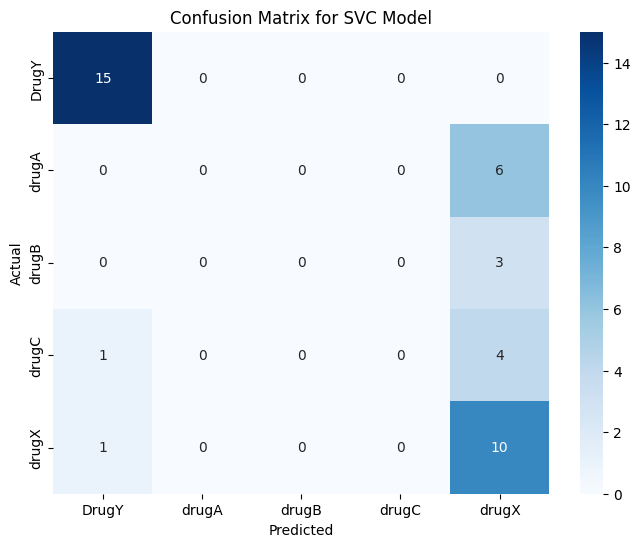

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svc_accuracy = accuracy_score(Y_test, svc_Y_pred)
svc_f1 = f1_score(Y_test, svc_Y_pred, average='weighted')
svc_cm = confusion_matrix(Y_test, svc_Y_pred)

print(f"SVC Model Accuracy: {svc_accuracy:.4f}")
print(f"SVC Model F1-score (weighted): {svc_f1:.4f}")
print("\nConfusion Matrix for SVC Model:")

plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC Model')
plt.show()